## 1. IMPORT DES BIBLIOTHÈQUES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

## 2. DATASET

In [ ]:
data = fetch_california_housing()

# Une seule variable explicative (feature 2 par exemple)
X = data.data[:, 0]
y = data.target 

## 3. VISUALISATION DES DONNÉES

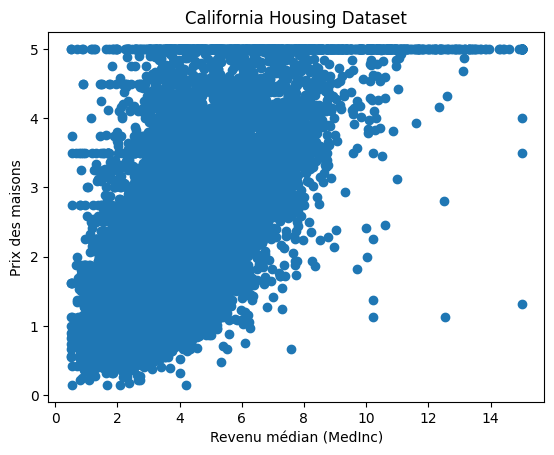

In [3]:
plt.figure()
plt.scatter(X, y)
plt.xlabel("Revenu médian (MedInc)")
plt.ylabel("Prix des maisons")
plt.title("California Housing Dataset")
plt.show()

## 4. Preprocessing

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_norm = scaler.fit_transform(X.reshape(-1, 1))

## 5. INITIALISATION DES PARAMÈTRES

In [5]:
theta_0 = 0.0   # biais
theta_1 = 0.0   # pente


learning_rate = 0.01
epochs = 100

## 6. FONCTIONS DE LA DESCENTE DU GRADIENT

In [6]:
def prediction(x, theta_1, theta_0):
    return theta_0 + theta_1 * x


def cost_function(X, y, theta_1, theta_0):
    m = len(X)
    predictions = theta_0 + theta_1 * X
    error = predictions - y
    J = (1/(2*m)) * np.sum(error**2)
    return J


def gradients(X, y, theta_1, theta_0):
    m = len(X)
    
    predictions = theta_0 + theta_1 * X
    error = predictions - y
    
    d_theta_0 = (1/m) * np.sum(error)
    d_theta_1 = (1/m) * np.sum(error * X)
    
    return d_theta_1, d_theta_0


In [7]:
X_norm = X_norm.flatten()

cost_history = []
cost = cost_function(X_norm, y, theta_1, theta_0)

for epoch in range(epochs):
    d_theta_1, d_theta_0 = gradients(X_norm, y, theta_1, theta_0)
    
    theta_1 = theta_1 - learning_rate * d_theta_1
    theta_0 = theta_0 - learning_rate * d_theta_0
    
    cost = cost_function(X_norm, y, theta_1, theta_0)
    cost_history.append(cost)


In [8]:
# Affichage des paramètres finaux
print("\nParamètres appris :")
print("theta_0 =", theta_0)
print("theta_1 =", theta_1)



Paramètres appris :
theta_0 = 1.3113989793975818
theta_1 = 0.5033635939759766


## 7. VISUALISATION du cout

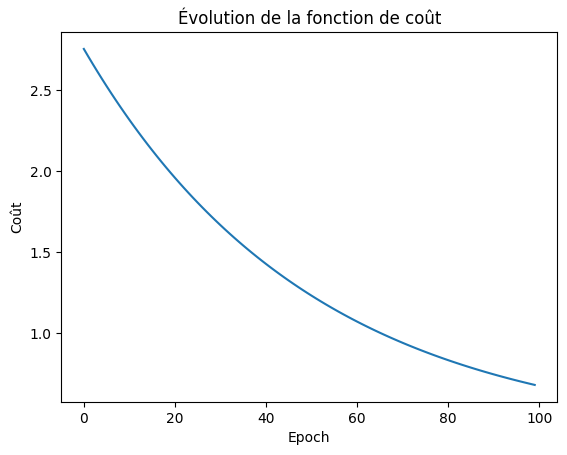

In [9]:
# la courbe de convergence
plt.plot(cost_history)
plt.title("Évolution de la fonction de coût")
plt.xlabel("Epoch")
plt.ylabel("Coût")
plt.show()